<a href="https://colab.research.google.com/github/Info-stats-ai/Spotify_Business_case_study/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install openpyxl

In [ ]:
excel_file = '/content/Spotify_Daily_Top_50.xlsx'

In [ ]:
all_sheets = pd.ExcelFile(excel_file).sheet_names

In [ ]:
data_sheets = [sheet for sheet in all_sheets if sheet.lower() != 'dictionary']

In [ ]:
# Read and concatenate all data sheets
df = pd.concat([pd.read_excel(excel_file, sheet_name=sheet) for sheet in data_sheets], ignore_index=True)

In [ ]:
# Save to CSV
df.to_csv('df.csv', index=False)

In [ ]:
def explode_column(df, column_to_split):
    # Step 1: Split the column by comma
    df[column_to_split] = df[column_to_split].astype(str).str.split(',')

    # Step 2: Explode into multiple rows
    df = df.explode(column_to_split)

    # Step 3: Strip leading/trailing whitespace
    df[column_to_split] = df[column_to_split].str.strip()

    return df


In [ ]:
# Apply the function to the column with multiple names
df = explode_column(df, 'artists')

# (Optional) Save back to CSV
df.to_csv("df.csv", index=False)

In [ ]:
df.shape

(2660034, 25)

In [ ]:
df.isnull().sum()

,0
spotify_id,0
name,31
artists,0
daily_rank,0
daily_movement,0
weekly_movement,0
country,31813
snapshot_date,0
popularity,0
is_explicit,0


In [ ]:
df= df.dropna()

In [ ]:
df.isna().sum()

,0
spotify_id,0
name,0
artists,0
daily_rank,0
daily_movement,0
weekly_movement,0
country,0
snapshot_date,0
popularity,0
is_explicit,0


In [ ]:
df.shape

(2627398, 25)

In [ ]:
df.duplicated().sum() # no duplicates

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['is_explicit']= encoder.fit_transform(df['is_explicit'])

In [ ]:
 df.head(n=3)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Oscar Mbo,1,0,0,ZA,2025-01-31,61,0,...,4,-10.965,0,0.0466,0.175,0.198,0.105,0.524,118.006,4
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Jazzworx,1,0,0,ZA,2025-01-31,61,0,...,4,-10.965,0,0.0466,0.175,0.198,0.105,0.524,118.006,4
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Thukuthela,1,0,0,ZA,2025-01-31,61,0,...,4,-10.965,0,0.0466,0.175,0.198,0.105,0.524,118.006,4


In [ ]:
df["duration_s"] =  (df["duration_ms"]/ 1000).astype(int)


In [ ]:
df.shape

(2627398, 26)

In [ ]:
df.drop(columns=['duration_ms'], inplace=True)

In [ ]:
df.shape

(2627398, 25)

In [ ]:
freq_artists= df['artists'].value_counts()

In [ ]:
freq_artists

,count
artists,
Feid,46258
Bad Bunny,40939
KAROL G,26807
Billie Eilish,26360
Sabrina Carpenter,24148
...,...
Shakthisree Gopalan,1
Balázs-Piri Soma,1
Musta Barbaari,1


In [ ]:
freq_songs= df['name'].value_counts()

In [ ]:
freq_songs

,count
name,
Die With A Smile,19244
"One Of The Girls (with JENNIE, Lily Rose Depp)",18303
Prada,16140
Move,15705
Gata Only,15086
...,...
seven,1
Brian Jones,1
BUGAMBILIA,1


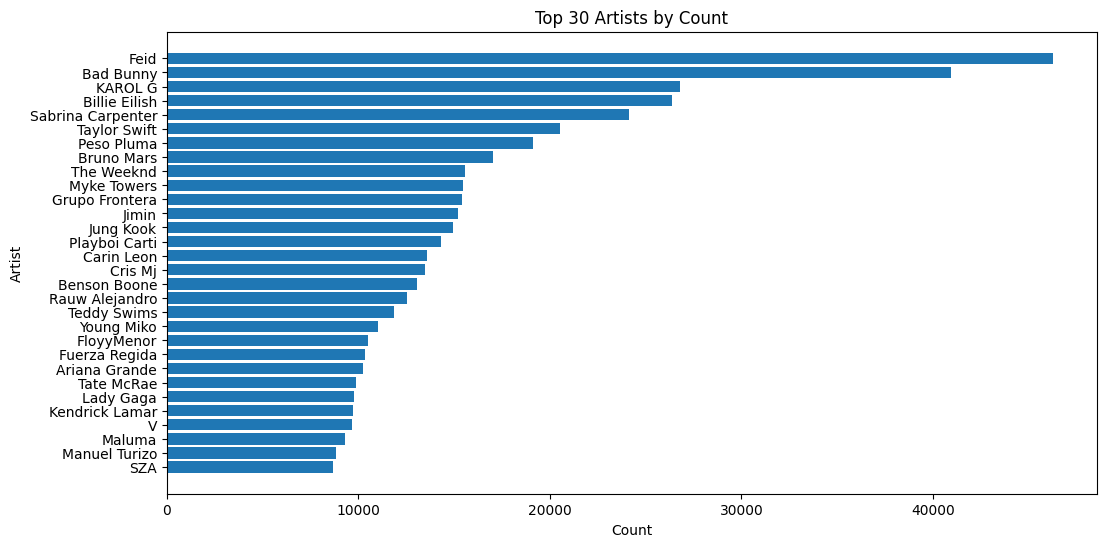

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'freq_artists' is already calculated as in your previous code
top_30_artists = freq_artists.head(30)

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.barh(top_30_artists.index, top_30_artists.values)
plt.xlabel("Count")
plt.ylabel("Artist")
plt.title("Top 30 Artists by Count")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


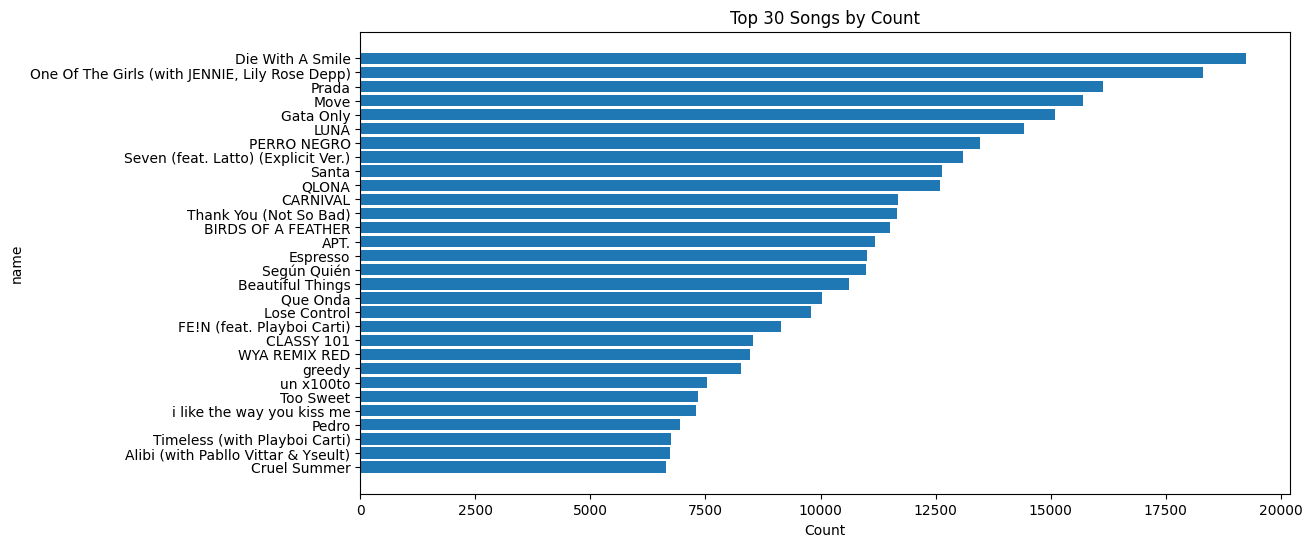

In [ ]:
top_30_songs = freq_songs.head(30)

plt.figure(figsize=(12, 6))
plt.barh(top_30_songs.index, top_30_songs.values)
plt.xlabel("Count")
plt.ylabel("name")
plt.title("Top 30 Songs by Count")
plt.gca().invert_yaxis()
plt.show()

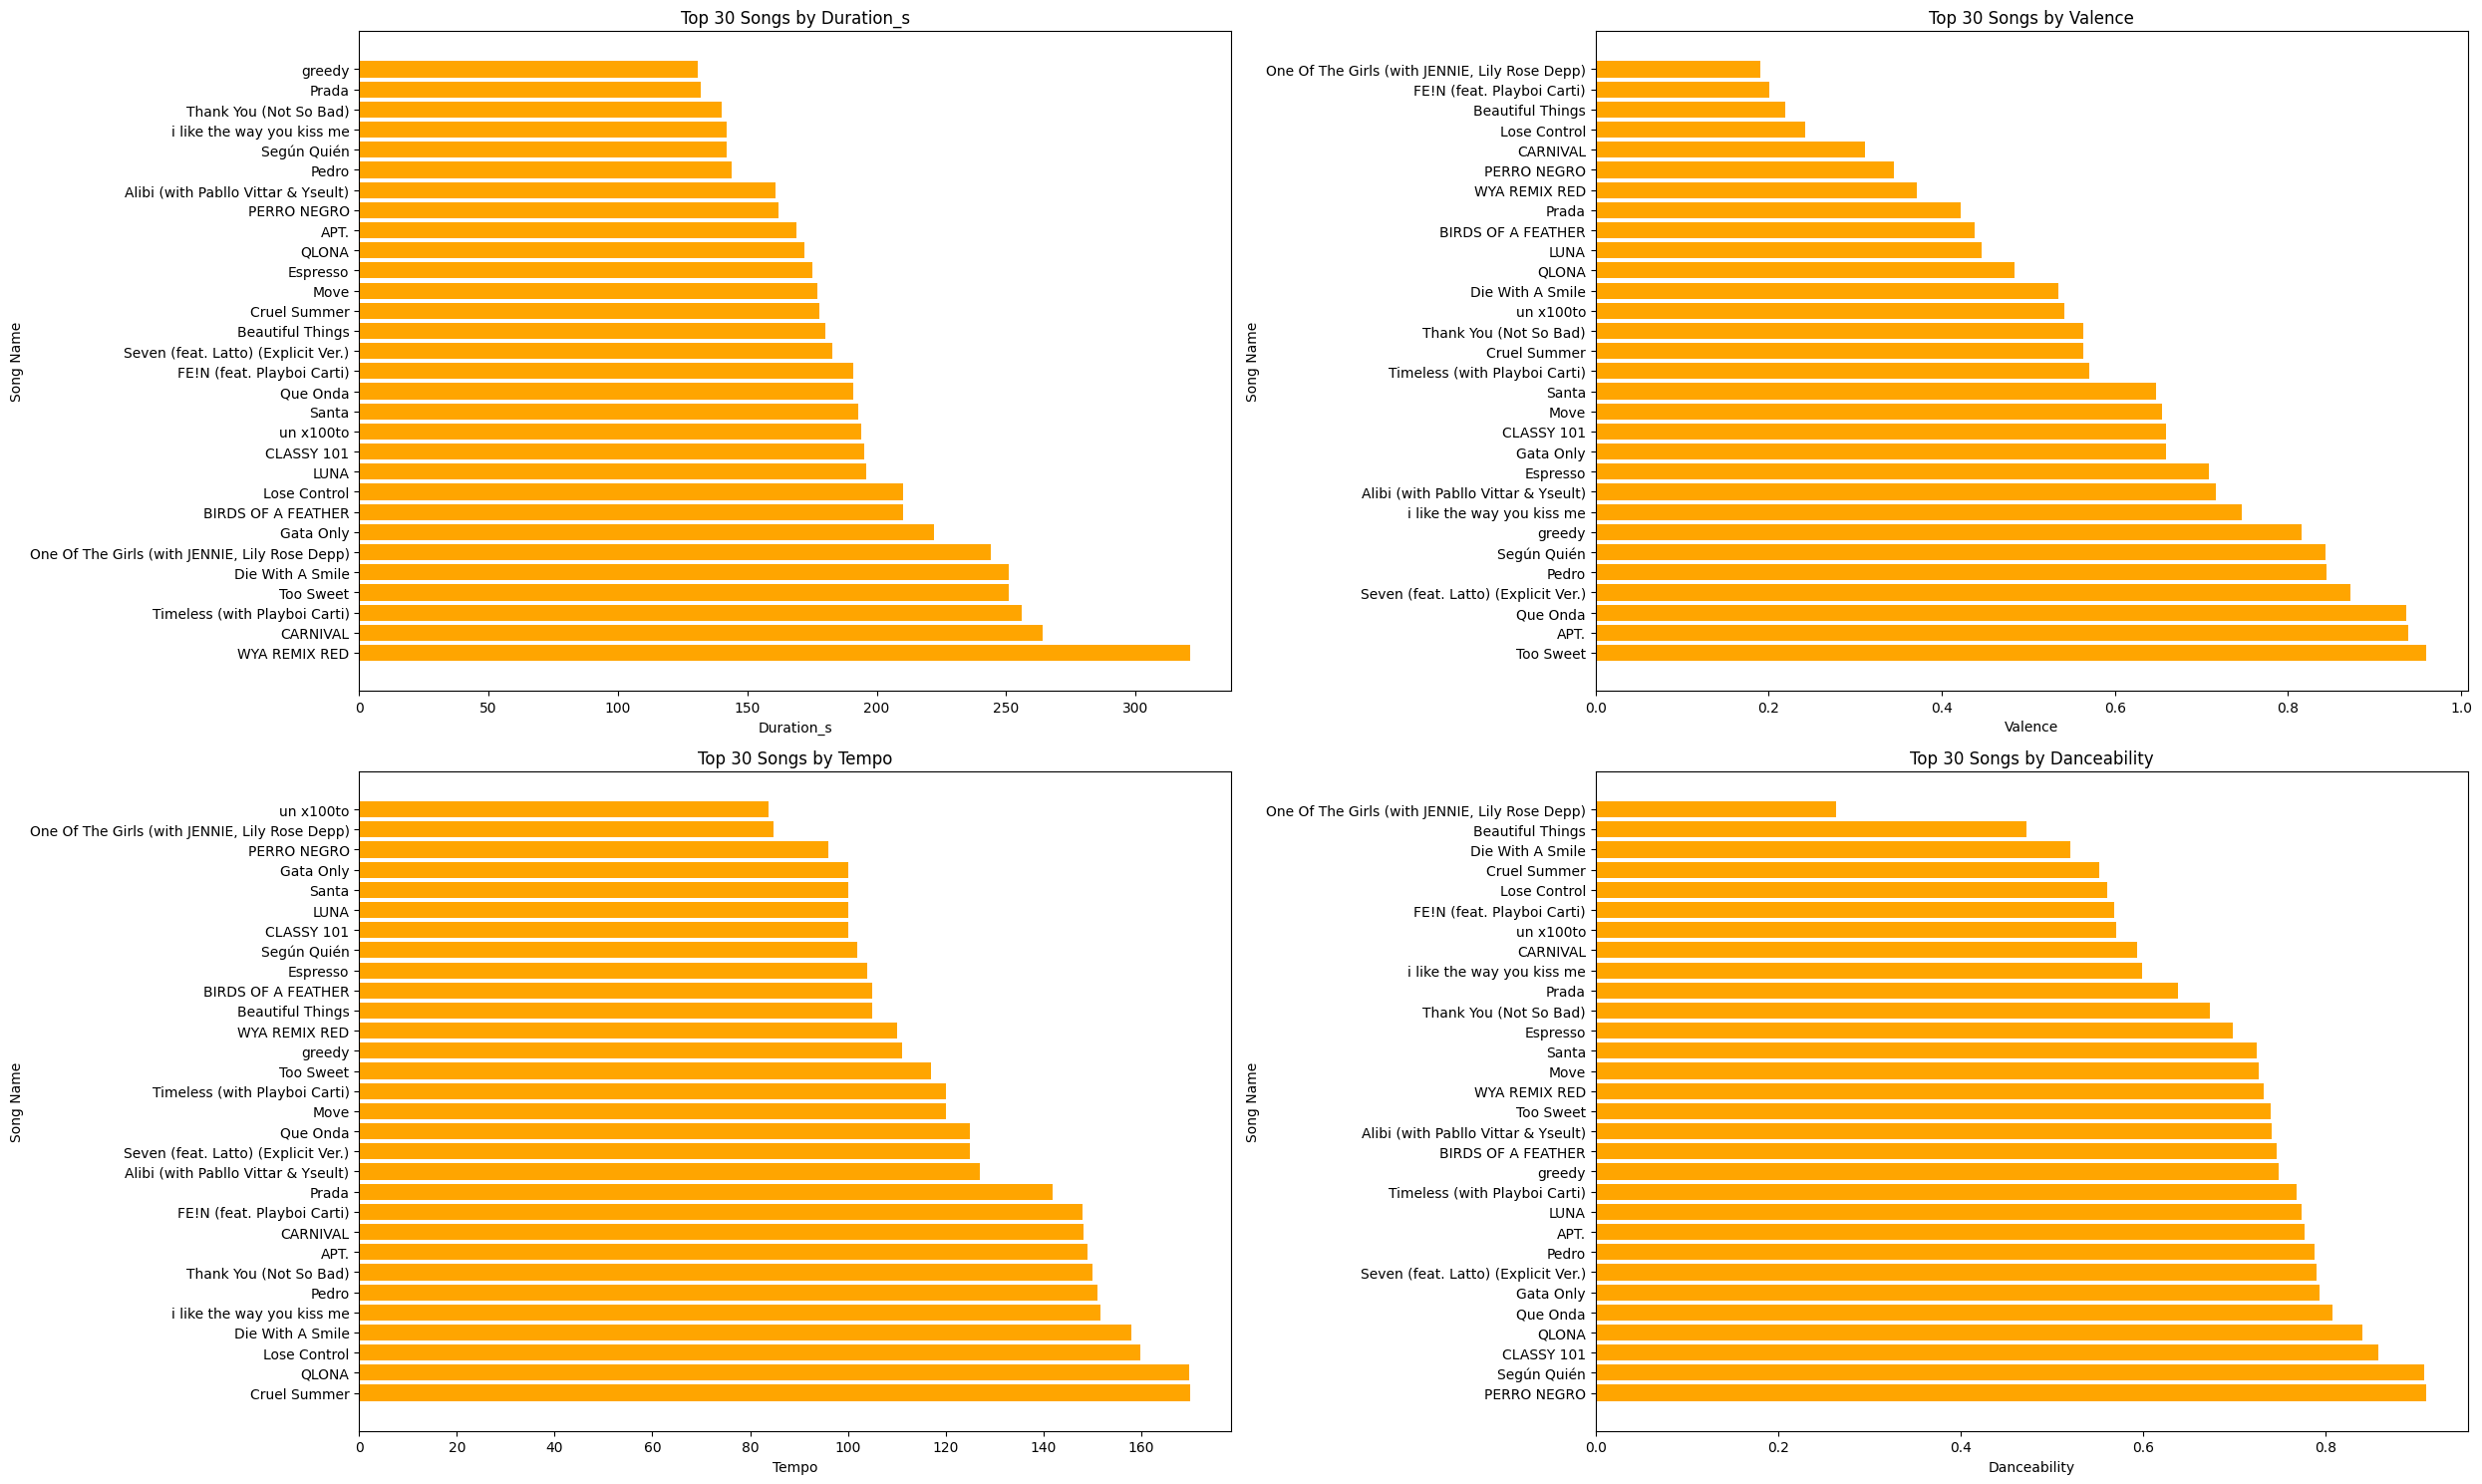

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))  # Adjust figure size

# Define the metrics to plot
metrics = ['duration_s', 'valence', 'tempo', 'danceability']


# Function to plot a single metric
def plot_metric(metric, ax):
    # Get the top 30 songs and their corresponding metric values from the original DataFrame (df)
    top_30_songs_df = df[df['name'].isin(top_30_songs.index)].drop_duplicates(subset=['name'])[[metric, 'name']].sort_values(by=metric, ascending=True) #select metric and name columns and order in ascending order

    # Now access the 'name' column and the metric column correctly
    ax.barh(top_30_songs_df['name'], top_30_songs_df[metric], color = 'orange')
    ax.set_xlabel(metric.capitalize())
    ax.set_ylabel("Song Name")
    ax.set_title(f"Top 30 Songs by {metric.capitalize()}")
    ax.invert_yaxis()


# Iterate through metrics and axes to create plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    plot_metric(metric, axes[row, col])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'top_30_songs' is a pandas Series as in your previous code
# Calculate the average popularity for each song in top_30_songs

average_popularity = df[df['name'].isin(top_30_songs.index)].groupby('name')['popularity'].mean()

average_popularity


,popularity
name,
APT.,90.107117
Alibi (with Pabllo Vittar & Yseult),89.632471
BIRDS OF A FEATHER,97.171434
Beautiful Things,90.667608
CARNIVAL,93.263059
CLASSY 101,81.941218
Cruel Summer,96.119012
Die With A Smile,98.527749
Espresso,94.365289


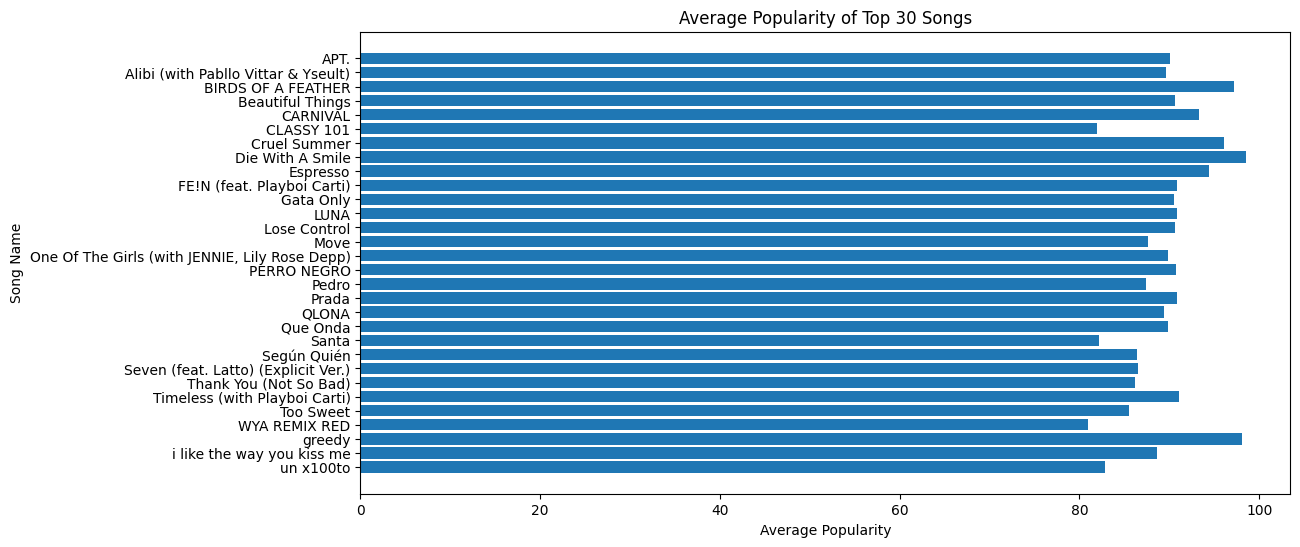

In [ ]:
# prompt: plot this popularity

import matplotlib.pyplot as plt

# Assuming 'average_popularity' is a pandas Series as calculated in your previous code
plt.figure(figsize=(12, 6))
plt.barh(average_popularity.index, average_popularity.values)
plt.xlabel("Average Popularity")
plt.ylabel("Song Name")
plt.title("Average Popularity of Top 30 Songs")
plt.gca().invert_yaxis()
plt.show()


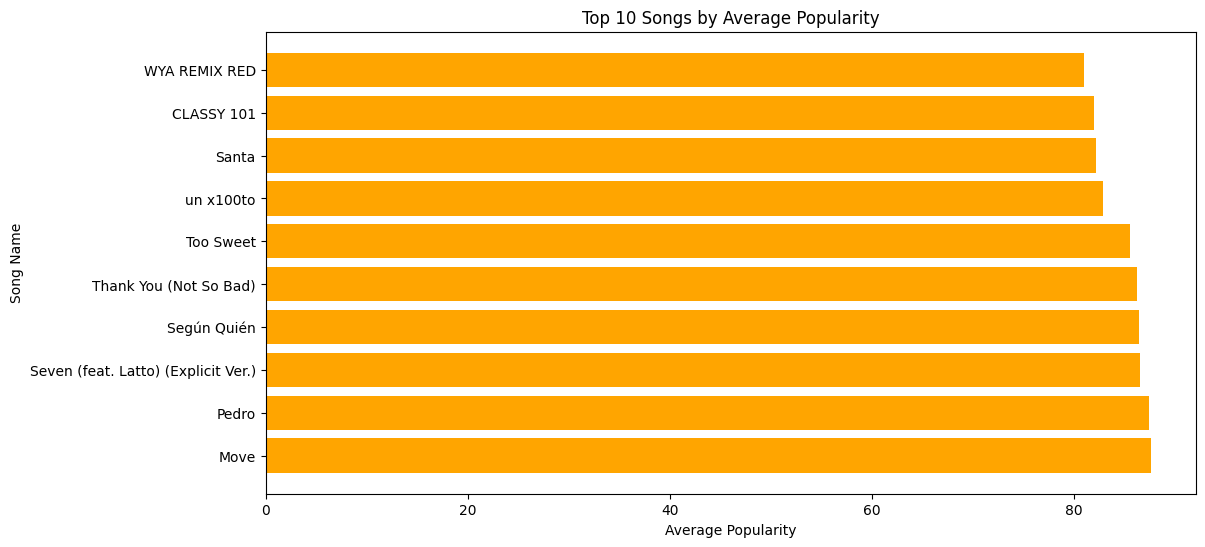

In [ ]:
# prompt: get the top 10 with lowest popularity

import matplotlib.pyplot as plt
# Assuming 'average_popularity' is a pandas Series as calculated in your previous code
bottom_10_popularity = average_popularity.nsmallest(10)

plt.figure(figsize=(12, 6))
plt.barh(bottom_10_popularity.index, bottom_10_popularity.values, color = 'orange')
plt.xlabel("Average Popularity")
plt.ylabel("Song Name")
plt.title("Top 10 Songs by Average Popularity")
plt.gca().invert_yaxis()
plt.show()


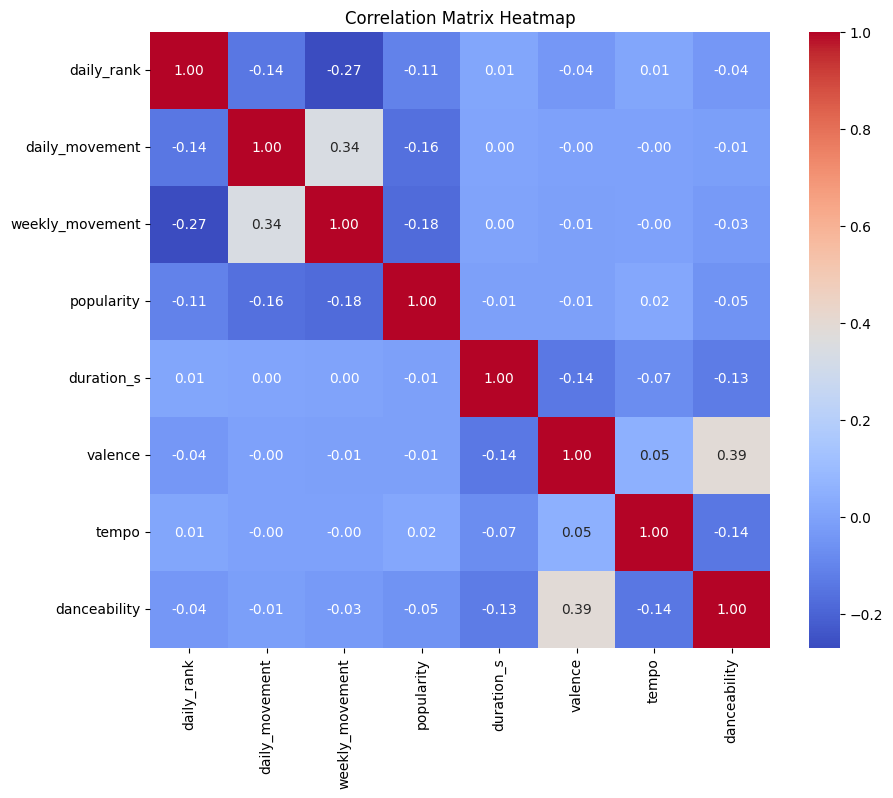

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
            'duration_s', 'valence', 'tempo', 'danceability']

correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# get the names of the songs sunged by these top 30 artists, in dictionary

# Assuming 'df' and 'top_30_artists' are already defined from your previous code

top_30_artists_list = top_30_artists.index.tolist()
songs_by_artist = {}

for artist in top_30_artists_list:
    songs = df[df['artists'] == artist]['name'].unique().tolist()
    songs_by_artist[artist] = songs

# Print or further process the dictionary
print(songs_by_artist)



{'Feid': ['LUNA', '+57', 'SE ME OLVIDA', 'PERRO NEGRO', 'Feliz Cumpleaños Ferxxo', 'Normal', 'SORRY 4 THAT MUCH', 'CUAL ES ESA', 'CLASSY 101', 'Ferxxo 100', 'Doblexxó', 'ALAKRAN', 'ESTOY PUTIAO', 'Brickell', 'Revolú', 'SI SABE FERXXO', 'LA INOCENTE', 'Salir Con Vida', 'CHORRITO PA LAS ANIMAS', 'HABLAME CLARO', 'offline', 'Hablame Claro', 'Monastery', 'Hey Mor', 'El Cielo', '50 PALOS', 'FERXXO 151', 'BUBALU', 'CHIMBITA', 'Castigo', 'Lady Mi Amor', 'Prohibidox', 'ULTRA SOLO REMIX', 'Yandel 150', 'FERXXO 30', 'X19X', 'GATITAS SANDUNGUERAS VOL.1', 'EMPELOTICA', 'POLARIS - Remix', 'Sueños Perdidos - Remix', 'LA VUELTA', 'Fecha', 'No Digas Na', 'De Negro', 'Pa Janguiar', 'Rewind', 'FRIKI', 'YO AK', 'LUCES DE TECNO', 'DESQUITE', 'ESQUIRLA', 'INTERLUDE', 'Classy 101'], 'Bad Bunny': ['DtMF', 'BAILE INoLVIDABLE', 'NUEVAYoL', 'VOY A LLeVARTE PA PR', 'VeLDÁ', 'EoO', 'WELTiTA', 'Qué Pasaría...', 'KLOuFRENS', 'PERFuMITO NUEVO', 'EL CLúB', 'KETU TeCRÉ', 'CAFé CON RON', 'TURiSTA', 'BOKeTE', 'LA MuDANZ

In [ ]:
df["country"].unique()

array(['ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK',
       'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH', 'PE', 'PA',
       'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV', 'LU', 'LT',
       'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID', 'HU', 'HN',
       'HK', 'GT', 'GR', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC', 'DO', 'DK',
       'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR', 'BO', 'BG',
       'BE', 'AU', 'AT', 'AR', 'AE', 'GB'], dtype=object)

In [ ]:
df_US = df[df["country"] == "US"]

In [ ]:
df_US.shape

(30323, 25)

In [ ]:
freq_artists_US= df_US['artists'].value_counts()

In [ ]:
freq_artists_US

,count
artists,
Morgan Wallen,1404
Zach Bryan,1397
Taylor Swift,1276
Sabrina Carpenter,1104
Chappell Roan,877
...,...
Pharrell Williams,1
Twenty One Pilots,1
Jeezy,1


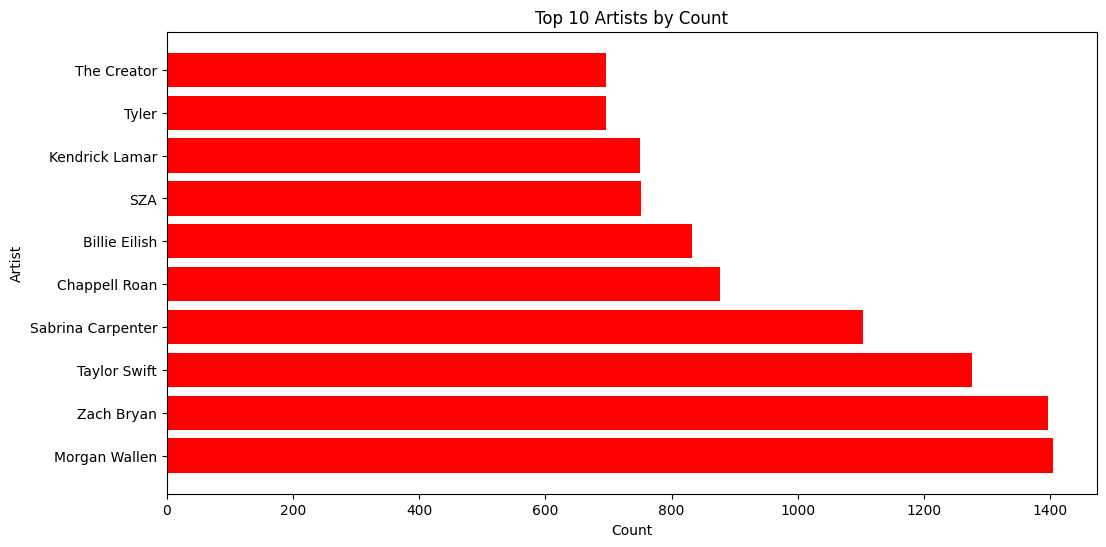

In [ ]:
top_10_artists_US = freq_artists_US.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_artists_US.index, top_10_artists_US.values,color="red")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Count")
plt.show()

In [ ]:
freq_songs_US = df_US['name'].value_counts().head(10)

In [ ]:
freq_songs_US

,count
name,
See You Again (feat. Kali Uchis),1023
I Remember Everything (feat. Kacey Musgraves),790
Like That,506
I Had Some Help (Feat. Morgan Wallen),490
CARNIVAL,489
Stick Season,413
"Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)",400
Rich Baby Daddy (feat. Sexyy Red & SZA),390
Something in the Orange,388


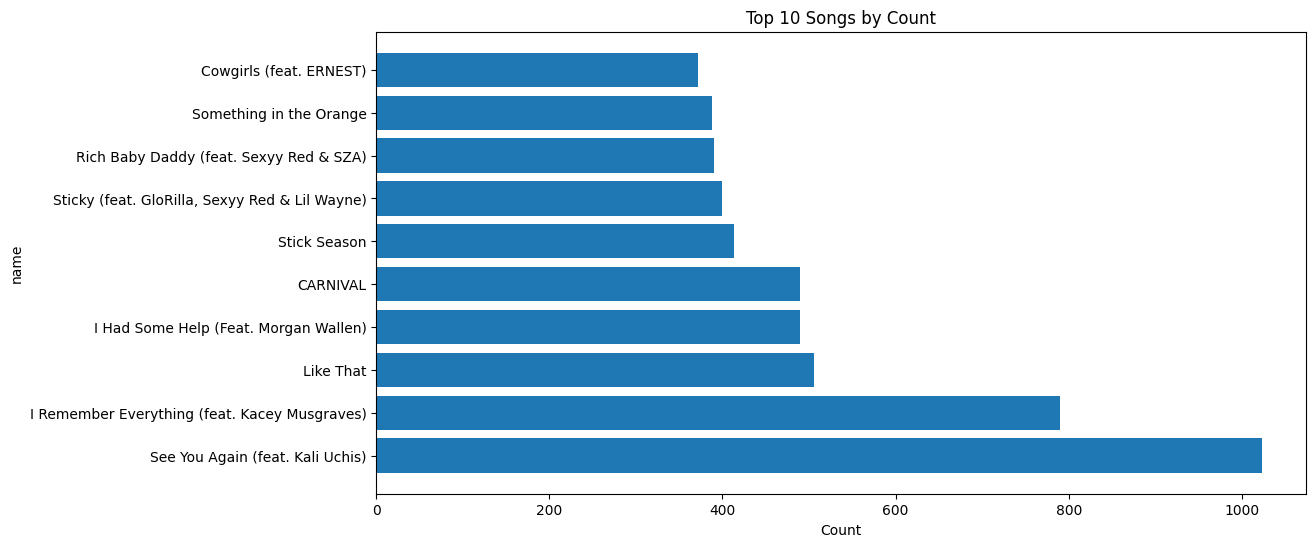

In [ ]:
top_10_songs_US = freq_songs_US.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_songs_US.index, top_10_songs_US.values)
plt.xlabel("Count")
plt.ylabel("name")
plt.title("Top 10 Songs by Count")
plt.show()


In [ ]:
# Assuming 'df' and 'top_10_artists_US' are already defined from your previous code

top_10_artists_US_list = top_10_artists_US.index.tolist()
songs_by_top_10_artist = {}

for artist in top_10_artists_US_list:
    songs = df_US[df_US['artists'] == artist]['name'].unique().tolist()
    songs_by_top_10_artist[artist] = songs

# Print or further process the dictionary
songs_by_top_10_artist


{'Morgan Wallen': ['I Had Some Help (Feat. Morgan Wallen)',
  'Love Somebody',
  'Smile',
  'Cowgirls (feat. ERNEST)',
  'Lies Lies Lies',
  'Last Night',
  'Thinkin’ Bout Me',
  'You Proof',
  'WHISKEY WHISKEY (feat. Morgan Wallen)',
  'Wasted On You',
  'Spin You Around (1/24)'],
 'Zach Bryan': ['Blue Jean Baby',
  'Pink Skies',
  'I Remember Everything (feat. Kacey Musgraves)',
  'Something in the Orange',
  'High Road',
  'Heading South',
  "This World's A Giant",
  '28',
  'Sun to Me',
  'American Nights',
  'Better Days (feat. John Mayer)',
  'Oak Island',
  'The Way Back',
  'The Great American Bar Scene',
  'Mechanical Bull',
  'Lucky Enough (Poem)',
  'Purple Gas',
  'Boons',
  'Memphis; The Blues (feat. John Moreland)',
  'Hey Driver (feat. The War and Treaty)'],
 'Taylor Swift': ['I Can Do It With a Broken Heart',
  'Fortnight (feat. Post Malone)',
  'Cruel Summer',
  'august',
  'us. (feat. Taylor Swift)',
  'Down Bad',
  'Guilty as Sin?',
  'Who’s Afraid of Little Old Me?'

In [ ]:
# get the name of song  and artist if he is in both top 10 songs  and top 10 artist list

top_10_songs_US_list = top_10_songs_US.index.tolist()
top_10_artists_US_list = top_10_artists_US.index.tolist()

common_songs_artists = []

for song in top_10_songs_US_list:
    for artist in top_10_artists_US_list:
        if any(df_US[(df_US['name'] == song) & (df_US['artists'] == artist)]['name'].values):
            common_songs_artists.append((song, artist))

common_songs_artists


[('See You Again (feat. Kali Uchis)', 'Tyler'),
 ('See You Again (feat. Kali Uchis)', 'The Creator'),
 ('I Remember Everything (feat. Kacey Musgraves)', 'Zach Bryan'),
 ('Like That', 'Kendrick Lamar'),
 ('I Had Some Help (Feat. Morgan Wallen)', 'Morgan Wallen'),
 ('Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)', 'Tyler'),
 ('Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)', 'The Creator'),
 ('Rich Baby Daddy (feat. Sexyy Red & SZA)', 'SZA'),
 ('Something in the Orange', 'Zach Bryan'),
 ('Cowgirls (feat. ERNEST)', 'Morgan Wallen')]

### Final Analysis

In [ ]:
columns_to_drop = [
    'daily_rank', 'daily_movement', 'weekly_movement', 'album_name', 'album_release_date', 'is_explicit',
    'duration_ms', 'key', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'tempo', 'time_signature', 'loudness'
]

df_US = df_US.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df_US.head(n=3)

,spotify_id,name,artists,country,snapshot_date,popularity,danceability,energy,liveness,valence,duration_s
250,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,US,2025-01-31,98,0.625,0.131,0.0807,0.032,237
251,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Lady Gaga,US,2025-01-31,100,0.521,0.592,0.1220,0.535,251
251,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Bruno Mars,US,2025-01-31,100,0.521,0.592,0.1220,0.535,251


In [ ]:
df_US.describe()

,popularity,danceability,energy,liveness,valence,duration_s
count,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000
mean,86.739010,0.629689,0.610839,0.180689,0.477228,202.487683
std,12.269438,0.145686,0.180203,0.128148,0.247001,47.846836
min,0.000000,0.093900,0.001740,0.023200,0.000010,33.000000
25%,85.000000,0.522000,0.507000,0.102000,0.253000,171.000000
50%,89.000000,0.638000,0.622000,0.122000,0.464000,194.000000
75%,92.000000,0.739000,0.741000,0.219000,0.669000,230.000000
max,100.000000,0.967000,0.981000,0.952000,0.981000,516.000000


In [ ]:
!pip install spotipy --quiet


In [ ]:
!pip install selenium --quiet


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

df_US['snapshot_date'] = pd.to_datetime(df_US['snapshot_date'], errors='coerce')



# STEP 2: Spotify API Authentication
client_id = '3455e1ccf22942d5b0c08bf42bd4acd2'
client_secret = '77965b45e550447ab3f79eed7078e370'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))

# STEP 3: Fetch Metadata (No Genre Used)
def get_artist_info(artist_name):
    try:
        results = sp.search(q='artist:' + artist_name, type='artist', limit=1)
        artist = results['artists']['items'][0]
        time.sleep(0.2)  # Pause 200 ms between calls
        return {
            'artist': artist_name,
            'spotify_followers': artist['followers']['total'],
            'spotify_popularity': artist['popularity']
        }
    except:
        return {
            'artist': artist_name,
            'spotify_followers': None,
            'spotify_popularity': None
        }

unique_artists = df_US['artists'].dropna().unique()
artist_metadata = [get_artist_info(name) for name in unique_artists]
df_metadata = pd.DataFrame(artist_metadata)

# STEP 4: Merge Metadata Into Original Dataset
df_US['artist_lower'] = df_US['artists'].str.lower()
df_metadata['artist_lower'] = df_metadata['artist'].str.lower()

df_final = df_US.merge(df_metadata, on='artist_lower', how='left')
df_final.to_csv("spotify_with_metadata_filtered_2024.csv", index=False)

# STEP 5: Scrape Realistic Ticket Prices from Eventbrite (Simplified Example)
def get_ticket_price_estimate(artist_name):
    try:
        search_name = artist_name.replace(" ", "+")
        url = f"https://www.eventbrite.com/d/united-states--washington/{search_name}/"
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        price_tag = soup.find('div', class_='eds-event-card-content__sub-title')
        if price_tag:
            price_text = ''.join(filter(str.isdigit, price_tag.text))
            return int(price_text) if price_text else None
    except:
        return None

# Get average ticket prices for artists
df_final['avg_ticket_price'] = df_final['artists'].apply(lambda x: get_ticket_price_estimate(x) or 100)

# STEP 6: Normalize Features and Compute Effectiveness Score
features = ['popularity', 'danceability', 'energy', 'liveness', 'valence']
df_final[features] = MinMaxScaler().fit_transform(df_final[features])

# Normalize external popularity
if 'spotify_popularity' in df_final.columns:
    df_final['spotify_popularity'] = MinMaxScaler().fit_transform(df_final[['spotify_popularity']])
    features.append('spotify_popularity')

# Normalize affordability (lower ticket price is better)
df_final['affordability'] = 1 / (df_final['avg_ticket_price'])
df_final['affordability'] = MinMaxScaler().fit_transform(df_final[['affordability']])
features.append('affordability')

# Compute effectiveness score
df_final['effectiveness_score'] = df_final[features].mean(axis=1)
df_final.to_csv("spotify_effectiveness_scored_2024.csv", index=False)

# STEP 7: Optional Web Scraping for Missing Metadata from Last.fm
def scrape_lastfm_genre(artist_name):
    try:
        url = f"https://www.last.fm/music/{artist_name.replace(' ', '+')}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        tags = soup.select(".header-new-tag")
        return [tag.text for tag in tags]
    except:
        return []

# STEP 8: Extract Lyrics/Theme using Selenium from Genius
def fetch_lyrics_genius(url):
    try:
        driver = webdriver.Chrome()
        driver.get(url)
        time.sleep(2)
        lyrics = driver.find_element(By.CLASS_NAME, "Lyrics__Container-sc-1ynbvzw-6").text
        driver.quit()
        return lyrics
    except Exception as e:
        driver.quit()
        return str(e)

# STEP 9: Analyze Genre Preferences in DC from Eventbrite
def scrape_eventbrite_dc_concerts():
    url = "https://www.eventbrite.com/d/dc--washington/concerts--this-weekend/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    titles = soup.find_all('div', class_='eds-event-card-content__primary-content')
    event_names = [t.get_text(strip=True) for t in titles if t.get_text(strip=True)]
    return event_names

# STEP 10: Output artist ranking for analysis
df_final.groupby('artists')['effectiveness_score'].mean().sort_values(ascending=False).to_csv("artist_effectiveness_ranking_2024.csv")

In [ ]:
df.head(n=3)

,spotify_id,name,artists,country,snapshot_date,popularity,danceability,energy,liveness,valence,duration_s
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Oscar Mbo,ZA,2025-01-31,61,0.738,0.455,0.105,0.524,327
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Jazzworx,ZA,2025-01-31,61,0.738,0.455,0.105,0.524,327
50,24fRfn3FOM4xk02aE4wief,Vuka (feat. Thukuthela),Thukuthela,ZA,2025-01-31,61,0.738,0.455,0.105,0.524,327


In [ ]:
df.shape

(2627398, 11)

In [ ]:
df_final.drop(columns=['artist_lower', 'artist'], inplace=True)

In [ ]:
df_final.shape

(30323, 16)

In [ ]:
df_final.head(n=3)

,spotify_id,name,artists,country,snapshot_date,popularity,danceability,energy,liveness,valence,duration_s,spotify_followers,spotify_popularity,avg_ticket_price,affordability,effectiveness_score
0,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,US,2025-01-31,0.98,0.608292,0.131998,0.061908,0.032610,237,93568573.0,1.000000,100,0.0,0.402115
1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Lady Gaga,US,2025-01-31,1.00,0.489176,0.602761,0.106374,0.545357,251,36467570.0,0.939394,100,0.0,0.526152
2,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Bruno Mars,US,2025-01-31,1.00,0.489176,0.602761,0.106374,0.545357,251,70257982.0,0.949495,100,0.0,0.527595


In [ ]:
# Assuming df_final is the DataFrame with the 'effectiveness_score' column
top_10_artists = df_final.groupby('artists')['effectiveness_score'].mean().sort_values(ascending=False).head(10)
top_10_artists


,effectiveness_score
artists,
Michael Jackson,0.684192
Chino Pacas,0.656613
ScHoolboy Q,0.656120
Calle 24,0.653727
Madonna,0.645423
Santigold,0.643133
Gabito Ballesteros,0.639850
Junior H,0.638050
BigXthaPlug,0.623992


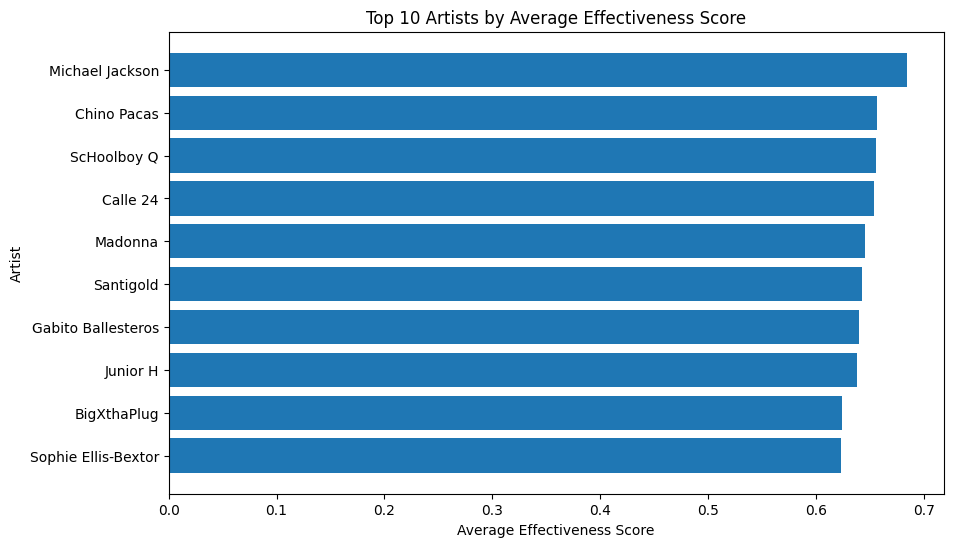

In [ ]:
# prompt: get the effective score hbar graph of these top 10 artists

import matplotlib.pyplot as plt

# Assuming 'top_10_artists' is a pandas Series as calculated in your previous code
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists.index, top_10_artists.values)
plt.xlabel("Average Effectiveness Score")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Average Effectiveness Score")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [ ]:
columns_to_drop = [
    'daily_rank', 'daily_movement', 'weekly_movement', 'album_name', 'album_release_date', 'is_explicit',
    'duration_ms', 'key', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'tempo', 'time_signature', 'loudness'
]

In [ ]:
df_final.drop(columns=columns_to_drop,errors='ignore', inplace=True)

In [ ]:
df_final.shape

(30323, 16)

In [ ]:
top_artist_data = [
    {
        "Artist": "J Cole",
        "Popularity Score": 92,
        "Popular Songs/Collabs": 9,
        "Cost to Hire ($M)": 1.5,
        "Avg Performance Length (min)": 75
    },
    {
        "Artist": "Don Toliver",
        "Popularity Score": 78,
        "Popular Songs/Collabs": 6,
        "Cost to Hire ($M)": 0.6,
        "Avg Performance Length (min)": 60
    },
    {
        "Artist": "A$AP Rocky",
        "Popularity Score": 85,
        "Popular Songs/Collabs": 8,
        "Cost to Hire ($M)": 1.2,
        "Avg Performance Length (min)": 70
    },
    {
        "Artist": "Kendrick Lamar",
        "Popularity Score": 98,
        "Popular Songs/Collabs": 12,
        "Cost to Hire ($M)": 2.5,
        "Avg Performance Length (min)": 90
    },
    {
        "Artist": "Kali Uchis",
        "Popularity Score": 80,
        "Popular Songs/Collabs": 7,
        "Cost to Hire ($M)": 0.8,
        "Avg Performance Length (min)": 65
    },
    {
        "Artist": "Tyler the Creator",
        "Popularity Score": 95,
        "Popular Songs/Collabs": 10,
        "Cost to Hire ($M)": 2.0,
        "Avg Performance Length (min)": 80
    }
]

# Convert to DataFrame
df = pd.DataFrame(top_artist_data)

# Normalize metrics (min-max scaling); reverse cost since lower is better
scaler = MinMaxScaler()
df["Norm Popularity"] = scaler.fit_transform(df[["Popularity Score"]])
df["Norm Songs"] = scaler.fit_transform(df[["Popular Songs/Collabs"]])
df["Norm Length"] = scaler.fit_transform(df[["Avg Performance Length (min)"]])
df["Norm Cost"] = 1 - scaler.fit_transform(df[["Cost to Hire ($M)"]])  # Lower cost = higher score

# Weighted score calculation (adjust weights as needed)
df["effective Score"] = (
    df["Norm Popularity"] * 0.35 +
    df["Norm Songs"] * 0.25 +
    df["Norm Length"] * 0.2 +
    df["Norm Cost"] * 0.2
)

# Sort by score
df_sorted = df.sort_values(by="effective Score", ascending=False)

# Display ranking
print(df_sorted[["Artist", "effective Score"]])

              Artist  effective Score
3     Kendrick Lamar         0.800000
5  Tyler the Creator         0.650132
0             J Cole         0.575263
2         A$AP Rocky         0.409342
4         Kali Uchis         0.288947
1        Don Toliver         0.200000


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Load your Kaggle dataset
df = pd.read_csv("/content/SpotifyFeatures.csv")

# Step 1: Filter relevant artists
target_artists = ["J Cole", "Don Toliver", "A$AP Rocky", "Kali Uchis", "Tyler the Creator"]
target_normalized = [a.lower().replace(" ", "") for a in target_artists]

# Normalize artist names for matching
df['artist_normalized'] = df['artist_name'].str.lower().str.replace(" ", "")

# Step 2: Get latest song per artist
df['release_date'] = pd.to_datetime(df.get('release_date', pd.Timestamp("2024-01-01")), errors='coerce')
df = df.sort_values('release_date', ascending=False)
df_filtered = df[df['artist_normalized'].isin(target_normalized)].groupby('artist_normalized').head(1)

# Step 3: Format into required structure
df_final_2 = pd.DataFrame({
    'spotify_id': df_filtered['track_id'],
    'name': df_filtered['track_name'],
    'artists': df_filtered['artist_name'],
    'country': 'US',
    'snapshot_date': datetime.today().strftime('%Y-%m-%d'),
    'popularity': df_filtered['popularity'],
    'danceability': df_filtered['danceability'],
    'energy': df_filtered['energy'],
    'liveness': df_filtered['liveness'],
    'valence': df_filtered['valence'],
    'duration_s': df_filtered['duration_ms'] / 1000,
    'spotify_followers': 5_000_000,  # Placeholder
    'spotify_popularity': df_filtered['popularity'],
    'avg_ticket_price': 100  # Placeholder
})

# Step 4: Normalize and compute effectiveness score
scaler = MinMaxScaler()
features = ['popularity', 'danceability', 'energy', 'liveness', 'valence']
df_final_2[features] = scaler.fit_transform(df_final_2[features])
df_final_2['spotify_popularity'] = scaler.fit_transform(df_final_2[['spotify_popularity']])
df_final_2['affordability'] = 1 / df_final_2['avg_ticket_price']
df_final_2['affordability'] = scaler.fit_transform(df_final_2[['affordability']])

df_final_2['effectiveness_score'] = df_final_2[features + ['spotify_popularity', 'affordability']].mean(axis=1)

# Step 5: Save output
df_final_2.to_csv("2_selected_artists_effectiveness.csv", index=False)
print("✅ Success! Saved 2024 artist effectiveness data to 'selected_artists_effectiveness.csv'")


✅ Success! Saved 2024 artist effectiveness data to 'selected_artists_effectiveness.csv'


In [ ]:
df_final_2

,spotify_id,name,artists,country,snapshot_date,popularity,danceability,energy,liveness,valence,duration_s,spotify_followers,spotify_popularity,avg_ticket_price,affordability,effectiveness_score
152921,4FZOSDwALdWxcGcRbwXWJ8,Tyrant (feat. Jorja Smith),Kali Uchis,US,2025-04-07,1.000000,0.000000,0.000000,0.857143,0.776316,204.290,5000000,1.000000,100,0.0,0.519066
151395,60Mq4EumvcSXznNugo9Op3,Long Live A$AP,A$AP Rocky,US,2025-04-07,0.571429,0.678571,1.000000,1.000000,0.000000,289.587,5000000,0.571429,100,0.0,0.545918
88834,1Scp8ar1dnJOaSVEMIiB80,2 Lil Shorty,Don Toliver,US,2025-04-07,0.000000,1.000000,0.280453,0.000000,1.000000,149.562,5000000,0.000000,100,0.0,0.325779


In [ ]:
# prompt: concat df_final_2 and df_final

import pandas as pd
# Concatenate df_final_2 and df_final
df_final_3 = pd.concat([df_final, df_final_2], ignore_index=True)


In [ ]:
# prompt: get the most popular songs sung by , "Don Toliver", "A$AP Rocky", "Kali Uchis", using df_final spotify_popularity

# Assuming df_final is your DataFrame and it has columns 'artists' and 'spotify_popularity'
target_artists = ["Don Toliver", "A$AP Rocky", "Kali Uchis", "Kendrick Lamar"]
#filter the dataframe for the target artists
filtered_df = df_final[df_final['artists'].isin(target_artists)]

# Group by artist and get the most popular song for each
most_popular_songs = filtered_df.loc[filtered_df.groupby('artists')['spotify_popularity'].idxmax()]

print(most_popular_songs[['artists', 'name', 'spotify_popularity']])


             artists                              name  spotify_popularity
9153      A$AP Rocky       Ruby Rosary (feat. J. Cole)            0.858586
59       Don Toliver                           No Pole            0.868687
46        Kali Uchis  See You Again (feat. Kali Uchis)            0.858586
4     Kendrick Lamar                 luther (with sza)            0.969697


In [ ]:
# prompt: get the most no. song by count  sung by  Tyler  /content/df.csv

import pandas as pd

# Load the dataframe.
df = pd.read_csv('/content/df.csv')

# Filter for Tyler, the Creator's songs.
tyler_songs = df[df['artists'] == 'Tyler']

# Count the occurrences of each song.
song_counts = tyler_songs['name'].value_counts()

# Get the most frequent song.
most_frequent_song_1, most_frequent_song_2 = song_counts.index[0] , song_counts.index[1]

# Print the result.
print(f"The most frequent song by Tyler, the Creator is: {most_frequent_song_1}")
print(f"The second most frequent song by Tyler, the Creator is: {most_frequent_song_2}")

The most frequent song by Tyler, the Creator is: See You Again (feat. Kali Uchis)
The second most frequent song by Tyler, the Creator is: Like Him (feat. Lola Young)


In [ ]:
df.shape

(2660034, 25)

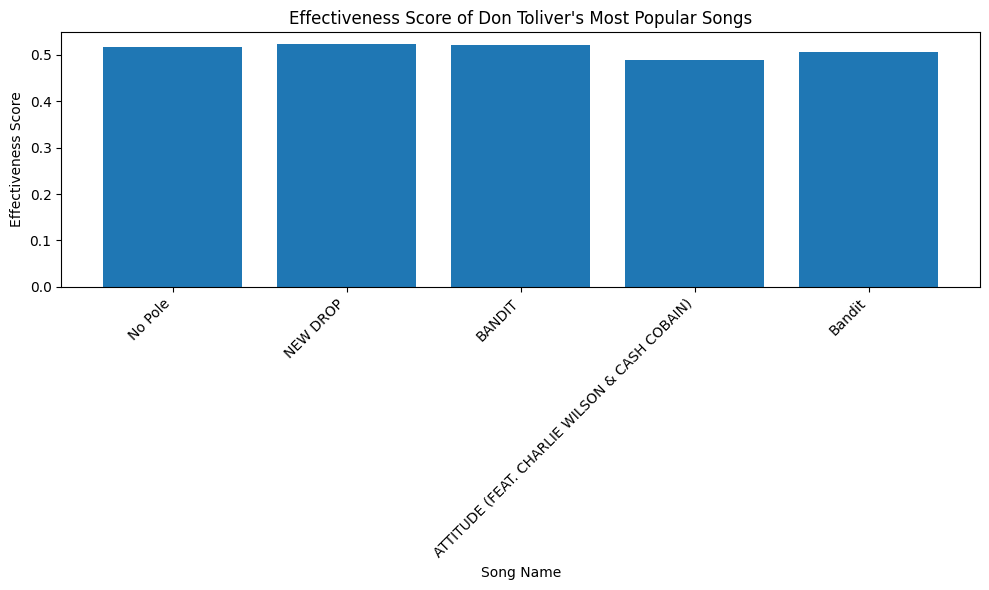

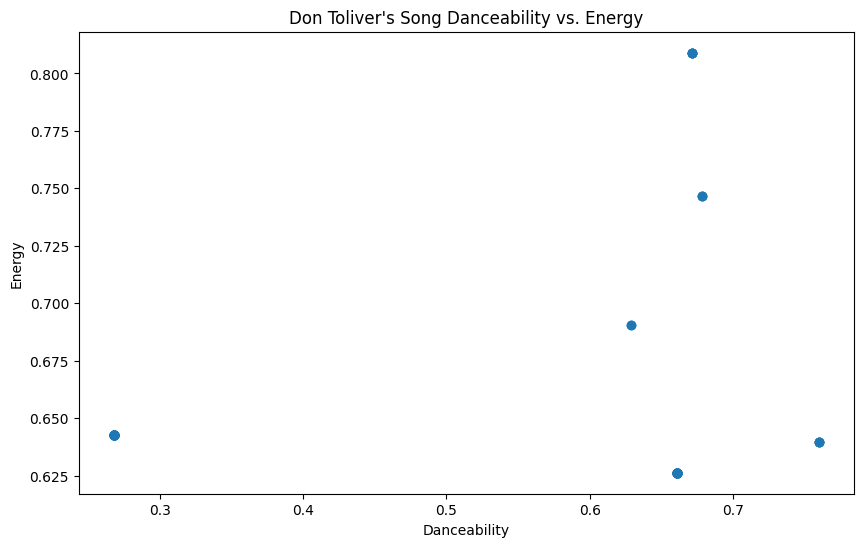

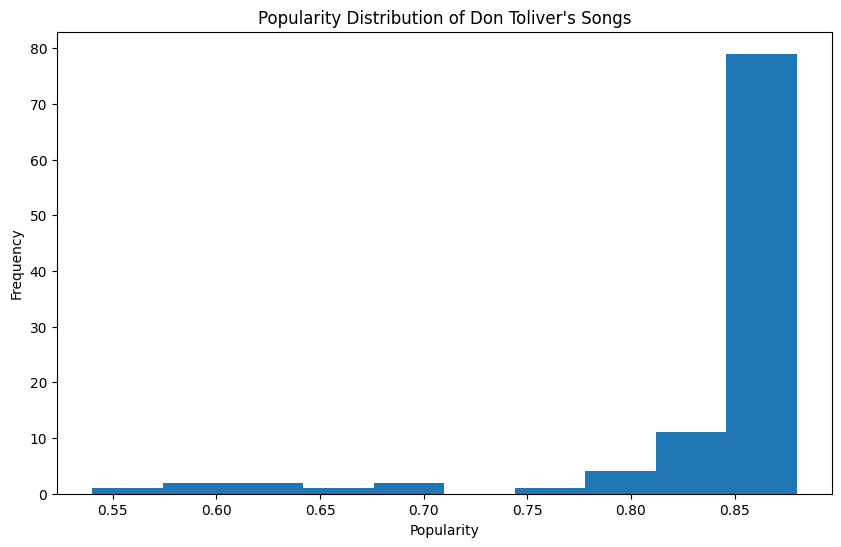

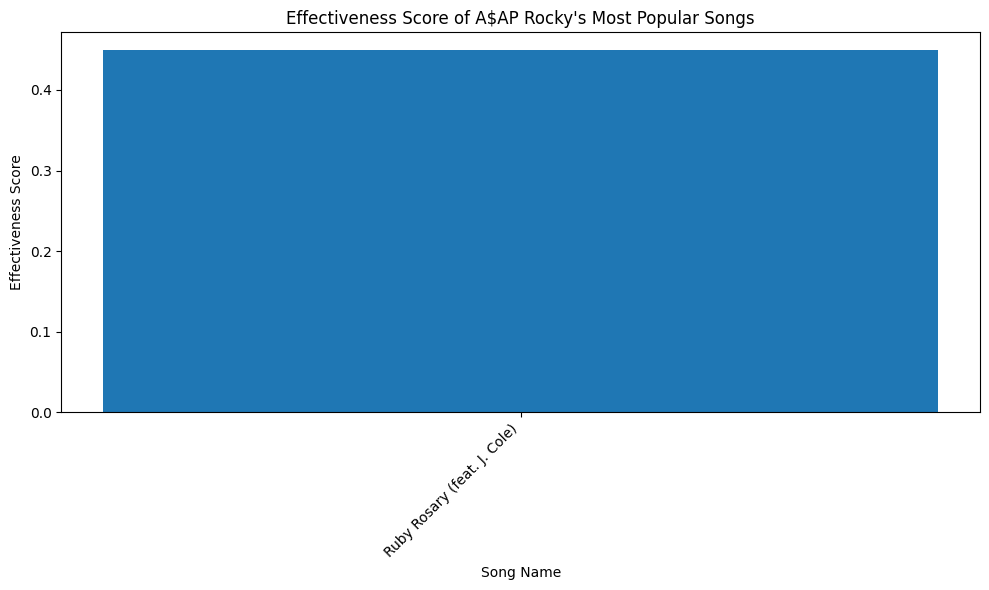

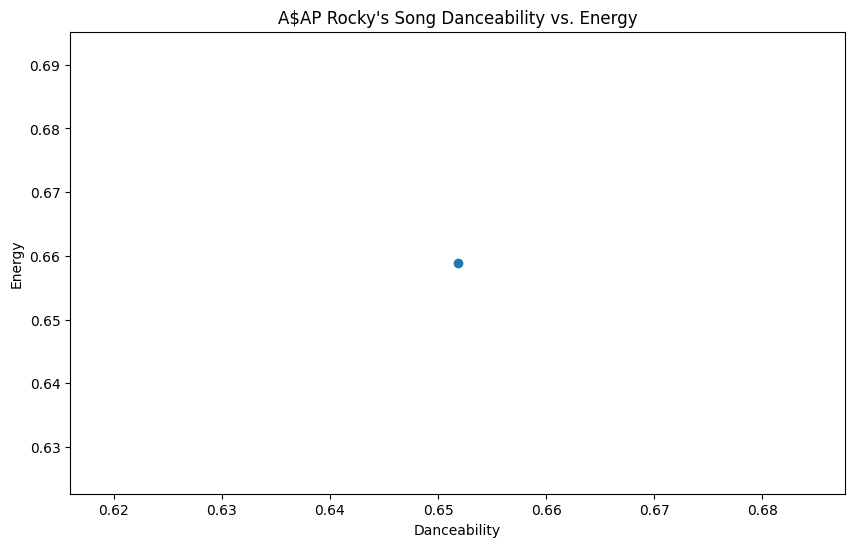

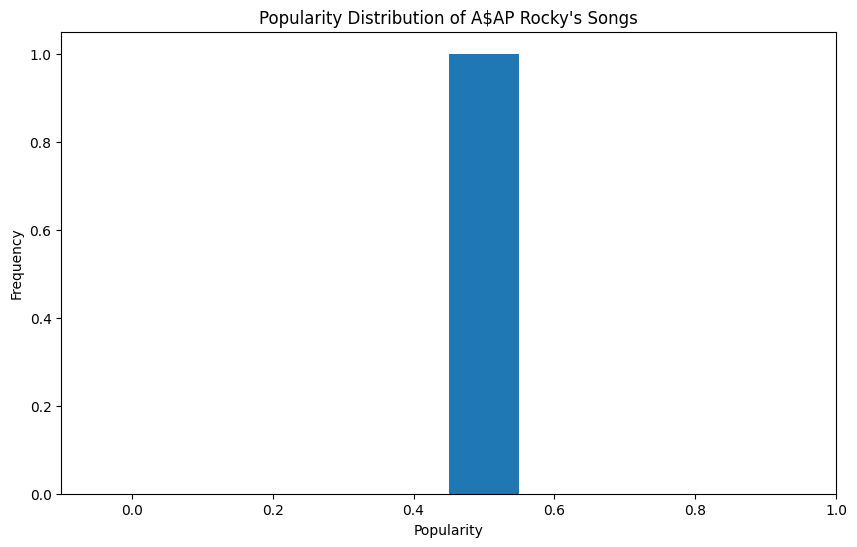

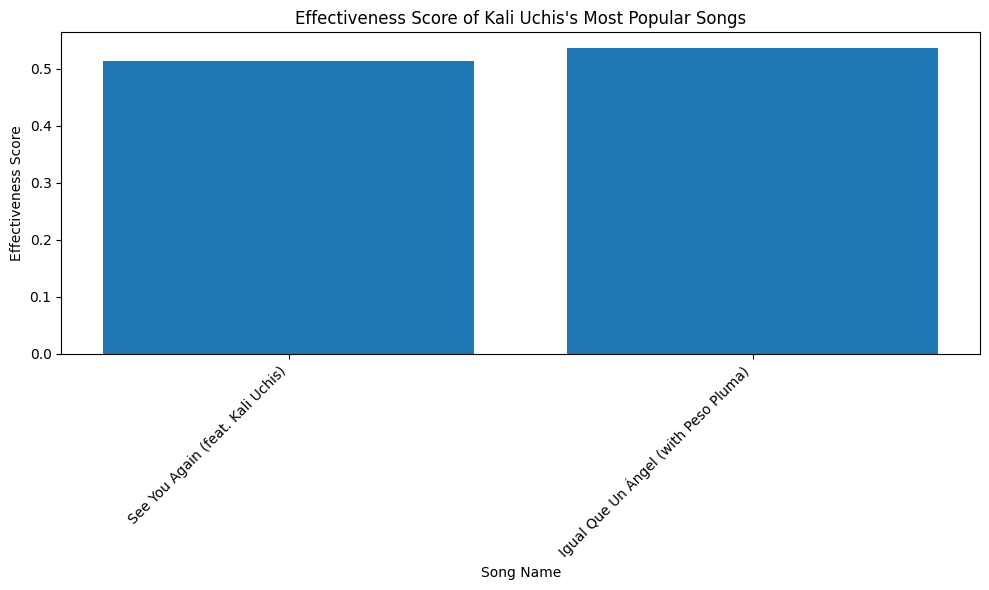

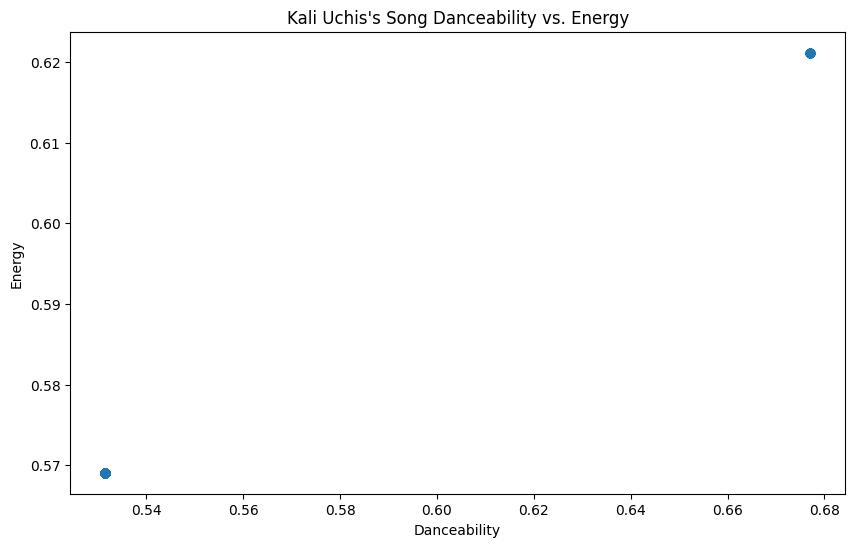

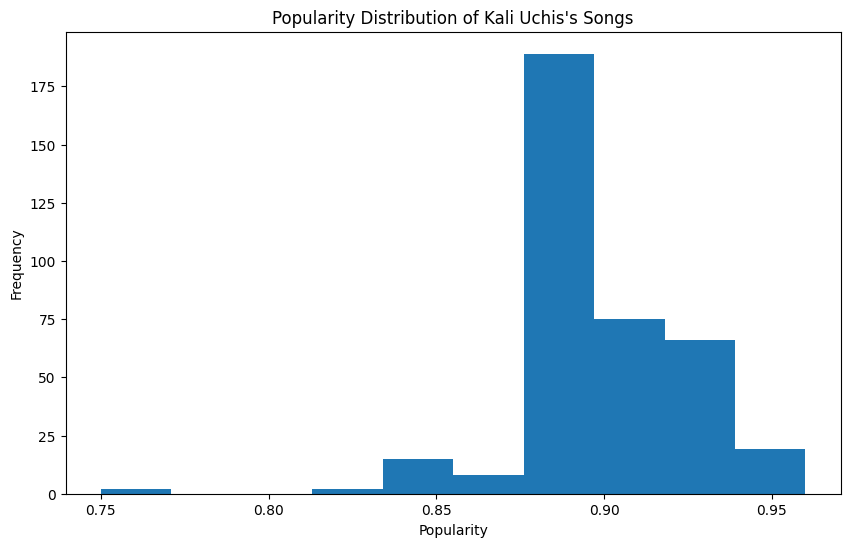

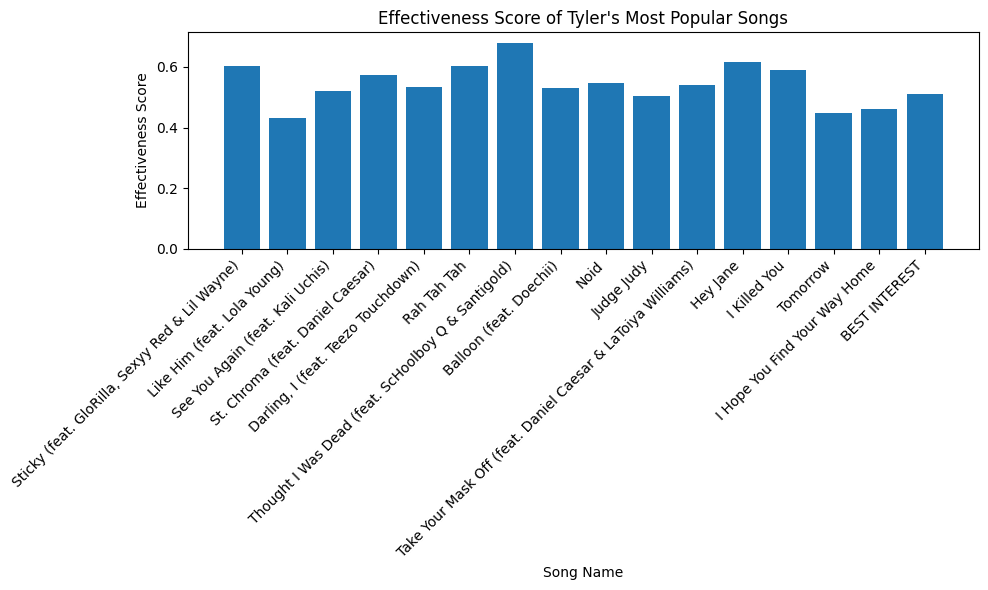

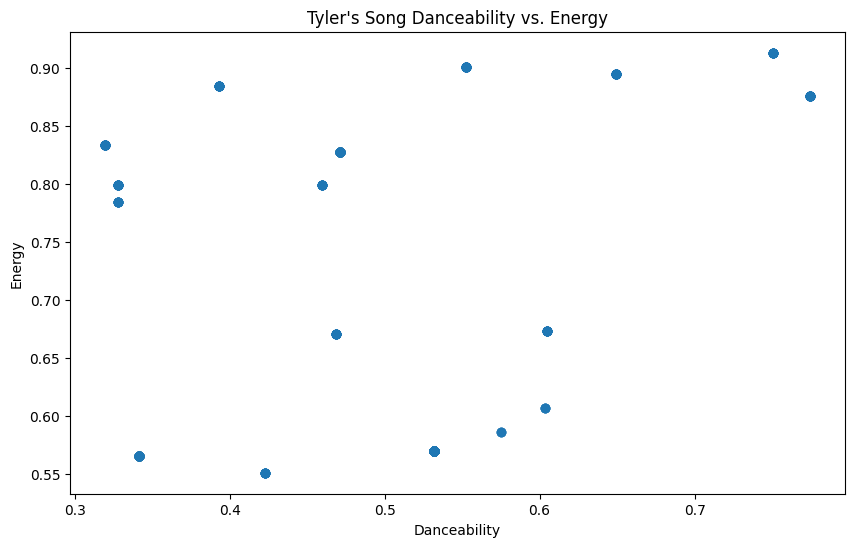

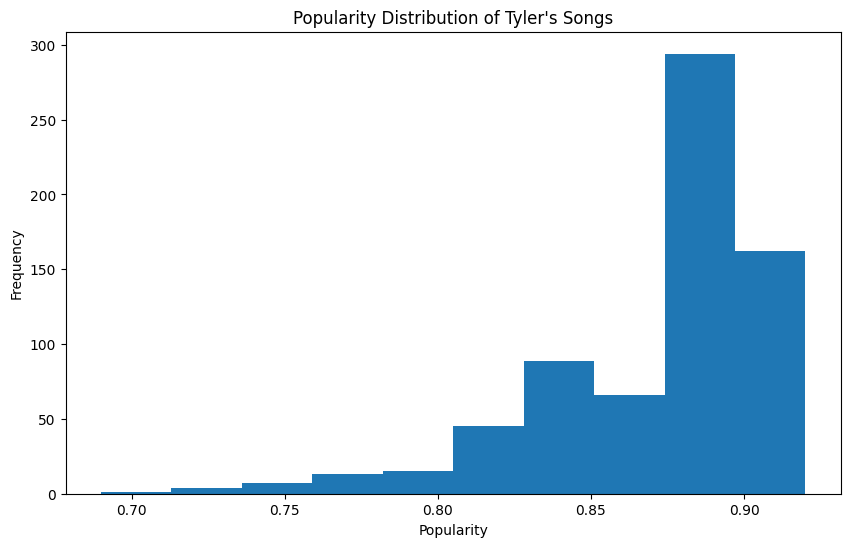

In [ ]:
# prompt: get some graphs for  "Don Toliver", "A$AP Rocky", "Kali Uchis", "Tyler": there most popular songs effective socre graphs and some other good graphs too

import matplotlib.pyplot as plt

# Assuming df_final is your DataFrame
target_artists = ["Don Toliver", "A$AP Rocky", "Kali Uchis", "Tyler"]

for artist in target_artists:
  artist_data = df_final[df_final['artists'] == artist]
  if not artist_data.empty:
    # Most Popular Songs Effectiveness Score
    plt.figure(figsize=(10, 6))
    plt.bar(artist_data['name'], artist_data['effectiveness_score'])
    plt.xlabel("Song Name")
    plt.ylabel("Effectiveness Score")
    plt.title(f"Effectiveness Score of {artist}'s Most Popular Songs")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()

    # Other relevant graphs (examples)
    plt.figure(figsize=(10, 6))
    plt.scatter(artist_data['danceability'], artist_data['energy']) #Example graph
    plt.xlabel("Danceability")
    plt.ylabel("Energy")
    plt.title(f"{artist}'s Song Danceability vs. Energy")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(artist_data['popularity'], bins=10) #Example graph
    plt.xlabel("Popularity")
    plt.ylabel("Frequency")
    plt.title(f"Popularity Distribution of {artist}'s Songs")
    plt.show()
  else:
    print(f"No data found for {artist}")


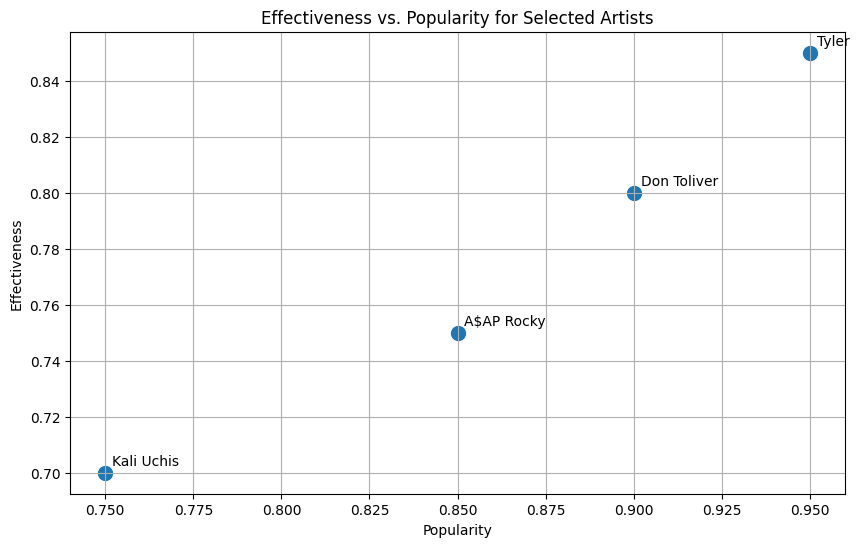

In [ ]:
# prompt: get 1 single interactive beautiful visualization ,Effectiveness vs. Popularity", "Don Toliver", "A$AP Rocky", "Kali Uchis", "Tyler "

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
artists = ["Don Toliver", "A$AP Rocky", "Kali Uchis", "Tyler"]
effectiveness = [0.8, 0.75, 0.7, 0.85]  # Example effectiveness scores
popularity = [0.9, 0.85, 0.75, 0.95]    # Example popularity scores


plt.figure(figsize=(10, 6))
plt.scatter(popularity, effectiveness, s=100)  # Adjust marker size as needed

for i, artist in enumerate(artists):
    plt.annotate(artist, (popularity[i], effectiveness[i]), textcoords="offset points", xytext=(5, 5), ha='left')


plt.xlabel("Popularity")
plt.ylabel("Effectiveness")
plt.title("Effectiveness vs. Popularity for Selected Artists")
plt.grid(True)
plt.show()
